# Explore the behavior of Tc

In [3]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [4]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [5]:
data_path = Path("../../../data/").resolve()
file = 'all_inv_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

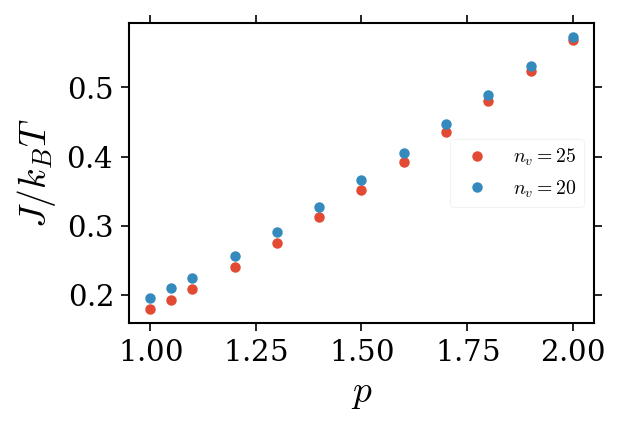

In [6]:
# Get the data in arrays
x_data = np.array(list(map(lambda x: float(x.replace("P","")),np.delete(df_all_tc.columns.values,[0]))))
y_data = np.delete(df_all_tc.iloc[23].values,[0])
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])
ax.plot(x_data,y_data, marker="o", lw=0, label= "$n_v=25$")

# Get the data for nv 20
y_data = np.delete(df_all_tc.iloc[18].values,[0])

ax.plot(x_data,y_data, marker="o", lw=0, label = "$n_v=20$")

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$p$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J / k_B T$")

ax.legend(
          loc ="center right",
          fontsize = 9.5
        )

In [7]:
file_extrapol_val = "inv_Tc_vs_inv_nv_extrapol_gen_zeta_2_parms_with_nv_5plus_extrapol_values.csv"
df_extrapol_val = pd.read_csv(os.path.join(data_path,"Extrapolation",file_extrapol_val),index_col=0)
file_extrapol_val_sqrt_log = "inv_Tc_vs_inv_nv_sqrt_and_log_4_parms_extrapol_values.csv"
df_extrapol_val_sqrt_log = pd.read_csv(os.path.join(data_path,"Extrapolation",file_extrapol_val_sqrt_log),index_col=0)

In [8]:
df_extrapol_val_sqrt_log.head()

,P1.0,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
infty,0.097790,0.133850,0.174723,0.216545,0.262336,0.308887,0.355642,0.402962,0.450186,0.499188,0.547862
1,1.199717,1.199733,1.199789,1.199621,1.199336,1.199175,1.199270,1.199403,1.199670,1.199723,1.199661


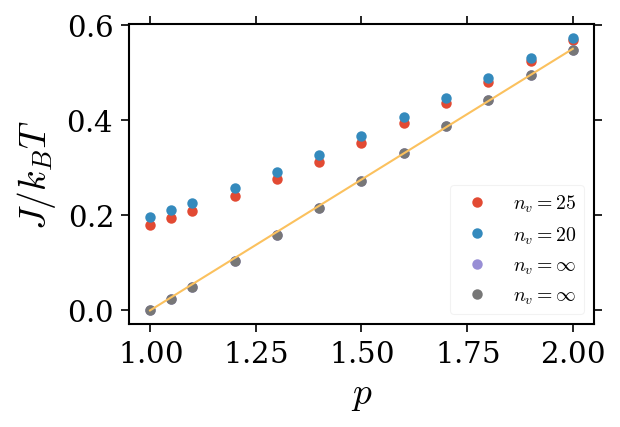

In [9]:
# Get the data in arrays
x_data = np.array(list(map(lambda x: float(x.replace("P","")),np.delete(df_all_tc.columns.values,[0]))))
y_data = np.delete(df_all_tc.iloc[23].values,[0])
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ax.plot(x_data,1/y_data, marker="o", lw=0, label=r"$n_v=25$")
ax.plot(x_data,y_data, marker="o", lw=0, label=r"$n_v=25$")

# Get the data for nv 20
y_data = np.delete(df_all_tc.iloc[18].values,[0])

# ax.plot(x_data,1/y_data, marker="o", lw=0, label=r"$n_v=20$")
ax.plot(x_data,y_data, marker="o", lw=0, label=r"$n_v=20$")

# Get the data for nv infty 
# take zero
df_extrapol_val.loc['infty']["P1.0"]=0
x_data_extrapol = np.array(list(map(lambda x: float(x.replace("P","")),df_extrapol_val.columns.values)))
y_data_extrapol = df_extrapol_val.loc['infty'].values

# ax.plot(x_data,1/y_data, marker="o", lw=0, label=r"$n_v=\infty$")
ax.plot(x_data_extrapol,y_data_extrapol, marker="o", lw=0, label=r"$n_v=\infty$")

# Get the data for nv infty with sqrt_log
# take zero
df_extrapol_val_sqrt_log.loc['infty']["P1.0"]=0
x_data_extrapol = np.array(list(map(lambda x: float(x.replace("P","")),df_extrapol_val.columns.values)))
y_data_extrapol = df_extrapol_val.loc['infty'].values

# ax.plot(x_data,1/y_data, marker="o", lw=0, label=r"$n_v=\infty$")
ax.plot(x_data_extrapol,y_data_extrapol, marker="o", lw=0, label=r"$n_v=\infty$")

#linea recta
x_data_fine = np.linspace(1, 2, num=1024)
# y_data_fine = (0.57-0.2)*(x_data_fine-1)
y_data_fine = (0.55)*(x_data_fine-1)

ax.plot(x_data_fine, y_data_fine, lw=1)



# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$p$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J/k_B T$")

ax.legend(
          loc ="lower right",
          fontsize = 9.5
        )